<a href="https://colab.research.google.com/github/atik-bd/MSc-BA/blob/main/ML_Retail_Store_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
# Mounting the packages into Colab
from pandas import read_csv, DataFrame, get_dummies,to_datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from  plotly import figure_factory

In [ ]:
# Mounting the dataset into Colab
data1=read_csv("/content/retail_store_inventory.csv")
data1.info() #Found no mssing data in any features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [ ]:
# Checking the first ten rows of the dataset
data1.head(10)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
5,2022-01-01,S001,P0006,Groceries,South,138,128,102,139.82,76.83,10,Sunny,1,79.35,Winter
6,2022-01-01,S001,P0007,Furniture,East,359,97,167,108.92,34.16,10,Rainy,1,36.55,Winter
7,2022-01-01,S001,P0008,Clothing,North,380,312,54,329.73,97.99,5,Cloudy,0,100.09,Spring
8,2022-01-01,S001,P0009,Electronics,West,183,175,135,174.15,20.74,10,Cloudy,0,17.66,Autumn
9,2022-01-01,S001,P0010,Toys,South,108,28,196,24.47,59.99,0,Rainy,1,61.21,Winter


In [ ]:
# Checking the numbers of rows and columns (features) in the dataset
data1.shape

(73100, 15)

In [ ]:
# Checking the basic statistics for the dataset
data1.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [ ]:
# Checking Datetime type data
DataFrame(data1['Date'][1200:1205])

,Date
1200,2022-01-13
1201,2022-01-13
1202,2022-01-13
1203,2022-01-13
1204,2022-01-13


In [ ]:
# Converting Datetime type data
data1['Date']=to_datetime(data1['Date'],format='mixed')
data1['year'] = data1['Date'].dt.year
data1['month'] = data1['Date'].dt.month
data1['day'] = data1['Date'].dt.day
data1=data1.drop(['Date'], axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Store ID            73100 non-null  object 
 1   Product ID          73100 non-null  object 
 2   Category            73100 non-null  object 
 3   Region              73100 non-null  object 
 4   Inventory Level     73100 non-null  int64  
 5   Units Sold          73100 non-null  int64  
 6   Units Ordered       73100 non-null  int64  
 7   Demand Forecast     73100 non-null  float64
 8   Price               73100 non-null  float64
 9   Discount            73100 non-null  int64  
 10  Weather Condition   73100 non-null  object 
 11  Holiday/Promotion   73100 non-null  int64  
 12  Competitor Pricing  73100 non-null  float64
 13  Seasonality         73100 non-null  object 
 14  year                73100 non-null  int32  
 15  month               73100 non-null  int32  
 16  day 

# Feature Selection

In [ ]:
# dropping manually irrelevant features
data1 = data1.drop(['Store ID'], axis = 1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product ID          73100 non-null  object 
 1   Category            73100 non-null  object 
 2   Region              73100 non-null  object 
 3   Inventory Level     73100 non-null  int64  
 4   Units Sold          73100 non-null  int64  
 5   Units Ordered       73100 non-null  int64  
 6   Demand Forecast     73100 non-null  float64
 7   Price               73100 non-null  float64
 8   Discount            73100 non-null  int64  
 9   Weather Condition   73100 non-null  object 
 10  Holiday/Promotion   73100 non-null  int64  
 11  Competitor Pricing  73100 non-null  float64
 12  Seasonality         73100 non-null  object 
 13  year                73100 non-null  int32  
 14  month               73100 non-null  int32  
 15  day                 73100 non-null  int32  
dtypes: f

## Data Encoding

In [ ]:
# Checking features with object data type
print("Product ID:", data1['Product ID'].unique())
print("Category:", data1['Category'].unique())
print("Region:", data1['Region'].unique())
print("Weather Condition:", data1['Weather Condition'].unique())
print("Seasonality:", data1['Seasonality'].unique())

Product ID: ['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010' 'P0011' 'P0012' 'P0013' 'P0014' 'P0015' 'P0016' 'P0017' 'P0018'
 'P0019' 'P0020']
Category: ['Groceries' 'Toys' 'Electronics' 'Furniture' 'Clothing']
Region: ['North' 'South' 'West' 'East']
Weather Condition: ['Rainy' 'Sunny' 'Cloudy' 'Snowy']
Seasonality: ['Autumn' 'Summer' 'Winter' 'Spring']


In [ ]:
# Label encoding for ordinal categorical variables
data1['Product ID']=data1['Product ID'].map({"P0020":19,"P0019":18,"P0018":17,"P0017":16,"P0016":15,"P0015":14,"P0014":13,"P0013":12,"P0012":11,"P0011":10,"P0010":9,"P0009":8,"P0008":7,"P0007":6,"P0006":5,"P0005":4,"P0004":3,"P0003":2,"P0002":1,"P0001":0})

In [ ]:
# One-Hot Encoding_ converts categorical features into multiple binary columns, drop first column to reduce feature
data1=get_dummies(data1,['Category','Region','Weather Condition','Seasonality'],dtype=int,drop_first=True)

In [ ]:
# checking the modified data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               73100 non-null  int64  
 1   Inventory Level          73100 non-null  int64  
 2   Units Sold               73100 non-null  int64  
 3   Units Ordered            73100 non-null  int64  
 4   Demand Forecast          73100 non-null  float64
 5   Price                    73100 non-null  float64
 6   Discount                 73100 non-null  int64  
 7   Holiday/Promotion        73100 non-null  int64  
 8   Competitor Pricing       73100 non-null  float64
 9   year                     73100 non-null  int32  
 10  month                    73100 non-null  int32  
 11  day                      73100 non-null  int32  
 12  Category_Electronics     73100 non-null  int64  
 13  Category_Furniture       73100 non-null  int64  
 14  Category_Groceries    

# Feature Reduction using Heatmap

In [ ]:
#Heatmap
correlation=data1.corr()
f=figure_factory.create_annotated_heatmap(correlation.values,list(correlation.columns),list(correlation.columns),correlation.round(2).values,showscale=True)
f.show()

**Here the feature pairs of  (Competitor Pricing, Price) and (Demand Forecast, Units Sold) are showing highly correlated from heatmap. but they are differnt things and can not interprete another. So we are not dropping any feature.**

## Data Scaling

In [ ]:
# Dividing dataset into label and feature sets
X = data1.drop(['Units Sold'], axis = 1) # Features
Y = data1['Units Sold'] # Label
print(X.shape)
print(Y.shape)

(73100, 24)
(73100,)


In [ ]:
# Data Scaling
x_scaled = StandardScaler().fit_transform(X)
x_scaled_n= DataFrame(x_scaled,columns=X.columns) #adding column names in dataframe

# Feature Reduction using P-Stats

In [ ]:
import statsmodels.api as sm
p_model=sm.add_constant(x_scaled_n)
p_model2=sm.OLS(Y,p_model).fit()
print(p_model2.summary())

                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 4.829e+05
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:56:02   Log-Likelihood:            -2.6120e+05
No. Observations:               73100   AIC:                         5.225e+05
Df Residuals:                   73075   BIC:                         5.227e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
print("Best fit R-squared:", p_model2.rsquared)
print("Best fit Adjusted R-squared:", p_model2.rsquared_adj)

Best fit R-squared: 0.9937336975474862
Best fit Adjusted R-squared: 0.9937316395076797


In [ ]:
p_values= p_model2.pvalues
significant_features=p_values[p_values<=0.05]
print(significant_features)

const              0.000000e+00
Inventory Level    1.904392e-43
Demand Forecast    0.000000e+00
Region_South       2.057812e-02
dtype: float64


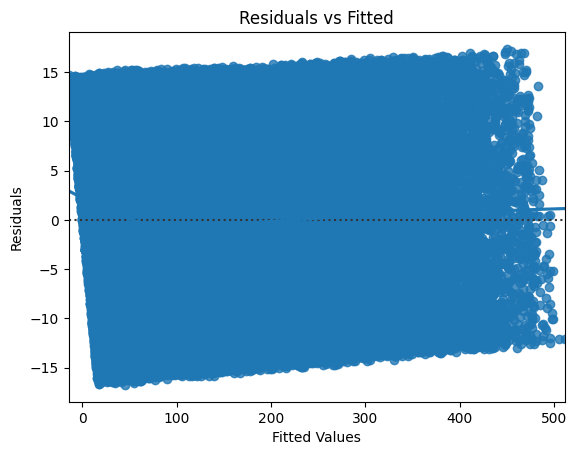

In [ ]:
# Checking Linearity
import statsmodels.stats.diagnostic as smd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import plot_ccpr_grid
sns.residplot(x=p_model2.fittedvalues, y=p_model2.resid, lowess=True)
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In a well-fitted model, the residuals should be randomly scattered around zero, showing no clear pattern. If we observe a funnel shape (increasing or decreasing spread) or any systematic pattern, it indicates heteroscedasticity, which violates the OLS assumption. If the residuals show a clear pattern, it suggests that the relationship between the predictors and the response variable may not be linear.

In [ ]:
# Checking multicollinearity
import statsmodels.stats.outliers_influence as oi
# Calculate VIF
vif = DataFrame()
vif["VIF"] = [oi.variance_inflation_factor(x_scaled_n.values, i) for i in range(x_scaled_n.shape[1])]
vif["features"] = x_scaled_n.columns

tolerance = 1 / vif["VIF"]
vif["Tolerance"] = tolerance
print(vif)

          VIF                 features  Tolerance
0    1.000319               Product ID   0.999681
1    1.530548          Inventory Level   0.653361
2    1.000246            Units Ordered   0.999754
3    1.530301          Demand Forecast   0.653466
4   82.238104                    Price   0.012160
5    1.000132                 Discount   0.999868
6    1.000185        Holiday/Promotion   0.999815
7   82.238212       Competitor Pricing   0.012160
8    1.000226                     year   0.999774
9    1.000684                    month   0.999317
10   1.000499                      day   0.999502
11   1.597291     Category_Electronics   0.626060
12   1.602186       Category_Furniture   0.624147
13   1.599859       Category_Groceries   0.625055
14   1.600749            Category_Toys   0.624707
15   1.496838             Region_North   0.668075
16   1.497564             Region_South   0.667751
17   1.496738              Region_West   0.668120
18   1.501122  Weather Condition_Rainy   0.666168


The dataset shows higher P values for the features and it reduces the significant features (p_values<=0.05) to 04 features only. Which will make the model underfitting. While checking for the probable reason for this higher P values, we learned about the Variance Inflation Factor (VIF). If independent variables are highly correlated with each other, it can inflate the standard errors of the coefficients, leading to higher p-values. So, we checked for the multicollinearity among predictors.  A tolerance value below 0.1 indicates a potential multicollinearity problem and a VIF value greater than 5 or 10 is often considered indicative of problematic multicollinearity.

In [ ]:
# dropping multicollinear features
x_scaled_n = x_scaled_n.drop(['Competitor Pricing'], axis = 1)
x_scaled_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               73100 non-null  float64
 1   Inventory Level          73100 non-null  float64
 2   Units Ordered            73100 non-null  float64
 3   Demand Forecast          73100 non-null  float64
 4   Price                    73100 non-null  float64
 5   Discount                 73100 non-null  float64
 6   Holiday/Promotion        73100 non-null  float64
 7   year                     73100 non-null  float64
 8   month                    73100 non-null  float64
 9   day                      73100 non-null  float64
 10  Category_Electronics     73100 non-null  float64
 11  Category_Furniture       73100 non-null  float64
 12  Category_Groceries       73100 non-null  float64
 13  Category_Toys            73100 non-null  float64
 14  Region_North          

# Linear Regression (LR)

In [ ]:
# Linear Regression (LR)
LinearRegression1 = linear_model.SGDRegressor(random_state = 1, penalty = None) # building
Hparameter1 = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000]}
grid_search1 = GridSearchCV(estimator=LinearRegression1, param_grid=Hparameter1, scoring='r2', cv=5)
grid_search1.fit(x_scaled_n,Y)

best_parameters = grid_search1.best_params_
print("Best parameters: ", best_parameters)
best_result_LR = grid_search1.best_score_
print("Best result: ", best_result_LR)
best_model_LR = grid_search1.best_estimator_
print("Intercept β0: ", best_model_LR.intercept_)
print(DataFrame(zip(x_scaled_n.columns, best_model_LR.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))

Best parameters:  {'eta0': 0.001, 'max_iter': 10000}
Best result:  0.9937276574081718
Intercept β0:  [136.43670033]
                   Features  Coefficients
3           Demand Forecast    108.268640
1           Inventory Level      0.553144
12       Category_Groceries      0.071579
0                Product ID      0.066039
4                     Price      0.045752
2             Units Ordered      0.023596
10     Category_Electronics      0.018224
8                     month      0.017876
19  Weather Condition_Sunny      0.017753
9                       day      0.008554
5                  Discount      0.007090
7                      year      0.002477
20       Seasonality_Spring     -0.004616
6         Holiday/Promotion     -0.004641
13            Category_Toys     -0.005323
11       Category_Furniture     -0.008466
21       Seasonality_Summer     -0.017448
17  Weather Condition_Rainy     -0.022386
22       Seasonality_Winter     -0.026739
18  Weather Condition_Snowy     -0.037068
14

In [ ]:
# #  Regularization
LinearRegression2 = linear_model.SGDRegressor(random_state = 1, penalty = 'elasticnet') # model building
Hparameter2 = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000],'alpha': [.001, .01, .1, 1,10, 100], 'l1_ratio': [0,0.25,0.5,0.75,1]}

grid_search2 = GridSearchCV(estimator=LinearRegression2, param_grid=Hparameter2, scoring='r2', cv=5)
grid_search2.fit(x_scaled_n, Y)

r, c=x_scaled_n.shape
print("r, c:", x_scaled_n.shape)

best_parameters_LR2 = grid_search2.best_params_
print("Best parameters: ", best_parameters_LR2)
best_model_LR2 = grid_search2.best_estimator_
print("Intercept β0: ", best_model_LR2.intercept_)
best_result_LR2 = grid_search2.best_score_
print("Best result LR2: ", best_result_LR2)
modified_r2_LR2 = 1-(1-best_result_LR2)*(4/5*r-1)/(4/5*r-c-1)# 4/5*r is number of rows in training set, c is number of columns
print("modified_r2_LR2: ", modified_r2_LR2)
print(DataFrame(zip(x_scaled_n.columns, best_model_LR2.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from pandas import Series
RF_Regressor1 = RandomForestRegressor(criterion='squared_error', max_features='sqrt', random_state=1)
no_Trees = {'n_estimators': [200,300,1000,2000]}
grid_search3 = GridSearchCV(estimator=RF_Regressor1, param_grid=no_Trees, scoring='r2', cv=5)
grid_search3.fit(x_scaled_n, Y)

best_parameters_RFR = grid_search3.best_params_
print("Best parameters RFR: ", best_parameters_RFR)
best_result_RFR = grid_search3.best_score_
print("Best result RFR: ", best_result_RFR)
modified_r2_RFR = 1-(1-best_result_RFR)*(4/5*r-1)/(4/5*r-c-1)
print("modified_r2 RFR: ", modified_r2_RFR)
Important_feature = Series(grid_search3.best_estimator_.feature_importances_, index=list(x_scaled_n)).sort_values(ascending=False) # Getting feature importances list for the best model
print(Important_feature)

#Support Vector Regression

In [ ]:
from sklearn.svm import SVR
SVRegressor = SVR()
cv=10
Hparameters4 = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [100,1000,10000], 'epsilon': [100,1000,10000]}
grid_search4 = GridSearchCV(estimator=SVRegressor, param_grid=Hparameters4, scoring='r2')
grid_search4.fit(x_scaled_n, Y)

best_parameters_SVR = grid_search4.best_params_
print("Best parameters SVR: ", best_parameters_SVR)
best_result_SVR = grid_search4.best_score_
print("Best result SVR: ", best_result_SVR)
r,c=x_scaled_n.shape
modified_r2_SVR = 1-(1-best_result_SVR)*((cv-1)/cv*r-1)/((cv-1)/cv*r-c-1)
# 9/10*r is number of rows in training set, c is number of columns
print("modified_r2 SVR: ", modified_r2_SVR)